In [ ]:
# importing the libraries for dataset
# Load "numpy" and "pandas" for manipulating numbers and data frames
# Load "matplotlib.pyplot" and "seaborn" for data visualisation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Daily Household Transactions.csv')


In [ ]:
df.head(10)

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR
5,15/09/2018 06:34:17,Credit Card,subscription,Tata Sky,Permanent Residence - Tata Play recharge,200.0,Expense,INR
6,14/09/2018 05:39:17,Cash,Transportation,auto,Place 2 station to Permanent Residence,50.0,Expense,INR
7,13/09/2018 21:35:15,Saving Bank account 1,Transportation,Train,2 Place 0 to Place 3,40.0,Expense,INR
8,13/09/2018 21:01:47,Credit Card,Other,NaN,HBR 2 Months subscription,83.0,Expense,INR
9,13/09/2018 21:01:32,Cash,Food,Grocery,1kg atta,46.0,Expense,INR


In [ ]:
df.shape

(2461, 8)

In [ ]:
df.index

RangeIndex(start=0, stop=2461, step=1)

In [ ]:
df.columns

Index(['Date', 'Mode', 'Category', 'Subcategory', 'Note', 'Amount',
       'Income/Expense', 'Currency'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


In [ ]:
df.describe()

,Amount
count,2461.000000
mean,2751.145380
std,12519.615804
min,2.000000
25%,35.000000
50%,100.000000
75%,799.000000
max,250000.000000


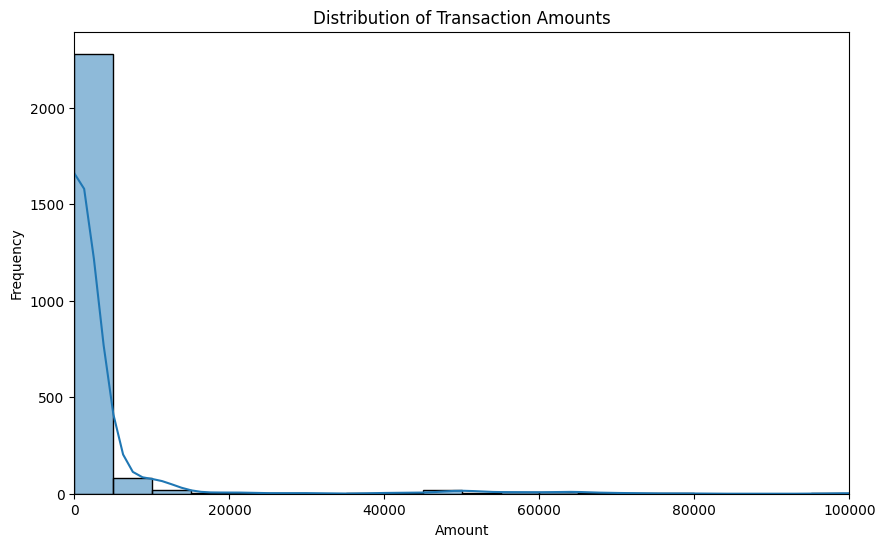

In [ ]:
# Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.xlim(0,100000)
plt.show()

In [ ]:
df['Date'] = df['Date'].str.strip()

# Convert to datetime with error handling
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check for any remaining NaT (invalid dates)
if df['Date'].isna().any():
    print("Rows with invalid dates:")
    print(df[df['Date'].isna()])



Rows with invalid dates:
     Date                   Mode          Category              Subcategory  \
2     NaT  Saving Bank account 1      subscription                  Netflix   
10    NaT  Saving Bank account 1  Small Cap fund 2                      NaN   
11    NaT  Saving Bank account 1  Small cap fund 1                      NaN   
12    NaT            Credit Card      subscription  Mobile Service Provider   
13    NaT  Saving Bank account 1              Food                    Lunch   
...   ...                    ...               ...                      ...   
2456  NaT                   Cash    Transportation                      NaN   
2457  NaT                   Cash    Transportation                      NaN   
2458  NaT                   Cash    Transportation                      NaN   
2459  NaT                   Cash              Food                      NaN   
2460  NaT                   Cash    Transportation                      NaN   

                          

<ipython-input-13-74d41be83fa6>:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [ ]:
# Check the null values
# before applying fillna method

df.isnull().sum()


,0
Date,1158
Mode,0
Category,0
Subcategory,635
Note,521
Amount,0
Income/Expense,0
Currency,0


There are null values in two columns:

 1). In Suncategory there are 635 null values.

 2). In Note column there are 521 null values.

In [ ]:
df.tail()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
2456,NaT,Cash,Transportation,NaN,share jeep - Place T base to top,20.0,Expense,INR
2457,NaT,Cash,Transportation,NaN,share auto - Place H to Place T base,20.0,Expense,INR
2458,NaT,Cash,Transportation,NaN,bus - brc to Place H,30.0,Expense,INR
2459,NaT,Cash,Food,NaN,tea,10.0,Expense,INR
2460,NaT,Cash,Transportation,NaN,share auto - hospital to brc station,10.0,Expense,INR


In [ ]:
df["Note"].fillna('unknown',inplace = True)

df["Subcategory"].fillna('unknown',inplace = True)
df[95:100]

<ipython-input-16-5ec55262f9d5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Note"].fillna('unknown',inplace = True)
<ipython-input-16-5ec55262f9d5>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
95,NaT,Cash,Household,Kirana,Supermart,18.0,Expense,INR
96,NaT,Cash,Food,flour mill,M D sure 4kg atta,216.0,Expense,INR
97,NaT,Cash,Health,Health,eyewear Glasses advance,1000.0,Expense,INR
98,NaT,Cash,Family,Pocket money,unknown,40.0,Expense,INR
99,NaT,Saving Bank account 1,Public Provident Fund,unknown,unknown,12500.0,Transfer-Out,INR


In [ ]:
df.replace(to_replace = "unknown", value = "Others")

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,2018-09-20 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,2018-09-20 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,NaT,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,2018-09-17 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,2018-09-16 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR
...,...,...,...,...,...,...,...,...
2456,NaT,Cash,Transportation,Others,share jeep - Place T base to top,20.0,Expense,INR
2457,NaT,Cash,Transportation,Others,share auto - Place H to Place T base,20.0,Expense,INR
2458,NaT,Cash,Transportation,Others,bus - brc to Place H,30.0,Expense,INR
2459,NaT,Cash,Food,Others,tea,10.0,Expense,INR


In [ ]:
df.tail()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
2456,NaT,Cash,Transportation,unknown,share jeep - Place T base to top,20.0,Expense,INR
2457,NaT,Cash,Transportation,unknown,share auto - Place H to Place T base,20.0,Expense,INR
2458,NaT,Cash,Transportation,unknown,bus - brc to Place H,30.0,Expense,INR
2459,NaT,Cash,Food,unknown,tea,10.0,Expense,INR
2460,NaT,Cash,Transportation,unknown,share auto - hospital to brc station,10.0,Expense,INR


In [ ]:
df.tail()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
2456,NaT,Cash,Transportation,unknown,share jeep - Place T base to top,20.0,Expense,INR
2457,NaT,Cash,Transportation,unknown,share auto - Place H to Place T base,20.0,Expense,INR
2458,NaT,Cash,Transportation,unknown,bus - brc to Place H,30.0,Expense,INR
2459,NaT,Cash,Food,unknown,tea,10.0,Expense,INR
2460,NaT,Cash,Transportation,unknown,share auto - hospital to brc station,10.0,Expense,INR


In [ ]:
# Duplicates

df[df.duplicated()]

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
16,NaT,Cash,Food,Milk,Half lit milk,36.0,Expense,INR
60,NaT,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
79,NaT,Saving Bank account 1,Small Cap fund 2,unknown,unknown,5000.0,Transfer-Out,INR
80,NaT,Saving Bank account 1,Small cap fund 1,unknown,unknown,5000.0,Transfer-Out,INR
83,NaT,Saving Bank account 1,Equity Mutual Fund E,unknown,unknown,1000.0,Transfer-Out,INR
...,...,...,...,...,...,...,...,...
2427,NaT,Cash,Other,unknown,garbage collector,50.0,Expense,INR
2440,NaT,Cash,Food,unknown,tea,20.0,Expense,INR
2447,NaT,Saving Bank account 1,Other,unknown,Permanent Residence money transfer,10000.0,Expense,INR
2449,NaT,Cash,Food,unknown,tea,10.0,Expense,INR


In [ ]:
df["Mode"].value_counts()

,count
Mode,
Saving Bank account 1,1223
Cash,1046
Credit Card,162
Equity Mutual Fund B,11
Share Market Trading,5
Saving Bank account 2,5
Recurring Deposit,3
Debit Card,2
Equity Mutual Fund C,1


<ipython-input-22-8624f1227864>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette = 'Set2', order=df['Category'].value_counts().index)


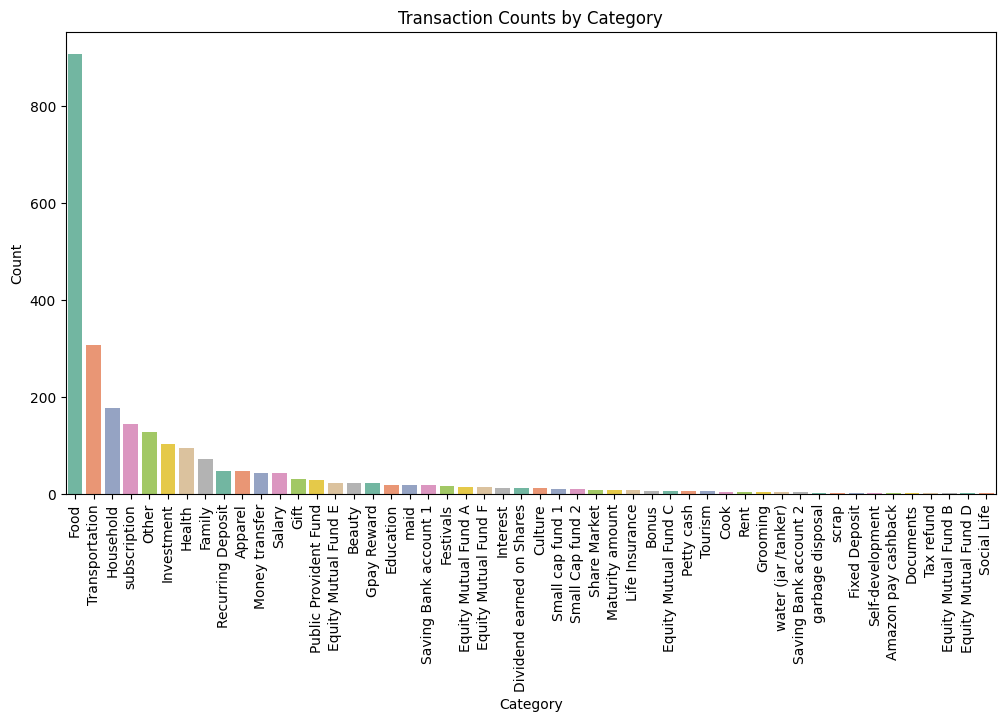

In [ ]:
# Transaction counts by Category
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category', palette = 'Set2', order=df['Category'].value_counts().index)
plt.title('Transaction Counts by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


<ipython-input-23-925c9c312453>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Subcategory', palette = 'Set2',order=df['Subcategory'].value_counts().index)


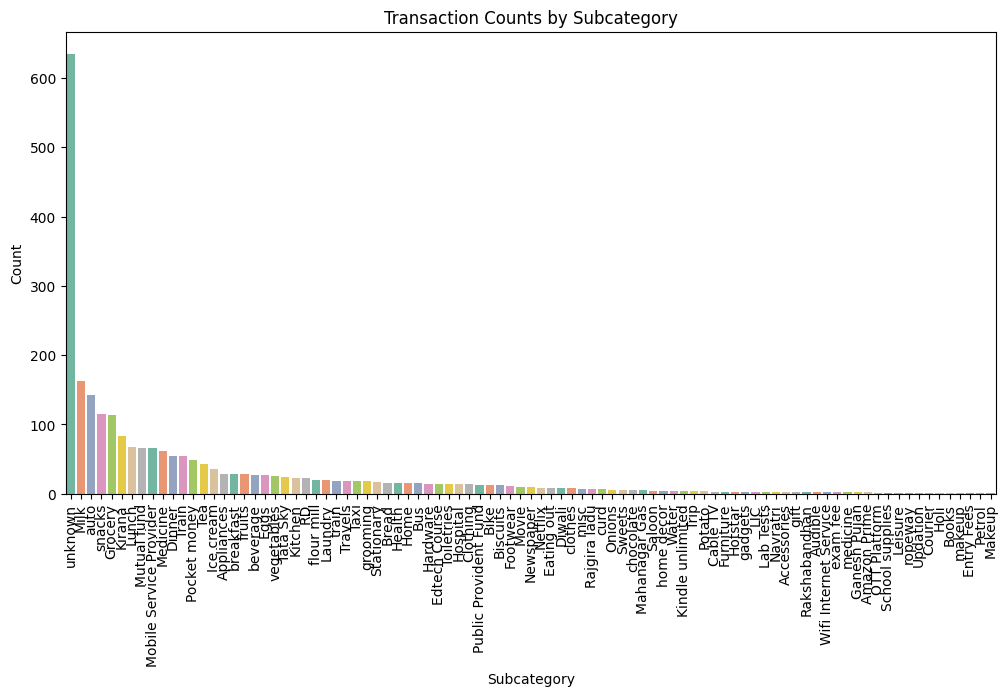

In [ ]:
# Transaction counts by Subcategory
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Subcategory', palette = 'Set2',order=df['Subcategory'].value_counts().index)
plt.title('Transaction Counts by Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


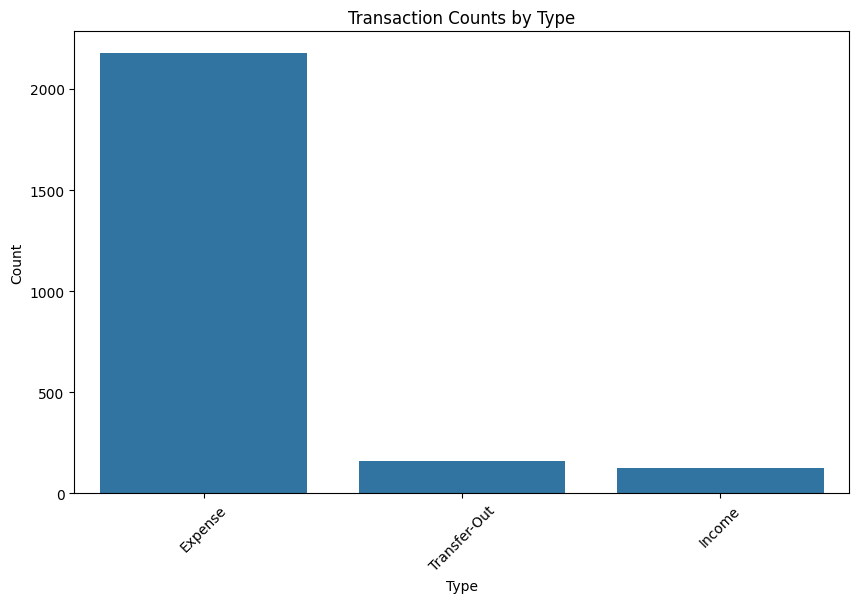

In [ ]:
# Plot the counts grouped by 'Income/Expense' or 'Category'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Income/Expense')  # Change to 'Category' if needed
plt.title('Transaction Counts by Type')
plt.xlabel('Type')  # Change to 'Category' if needed
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels if there are many unique values
plt.show()

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 2420
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1303 non-null   datetime64[ns]
 1   Mode            1303 non-null   object        
 2   Category        1303 non-null   object        
 3   Subcategory     1303 non-null   object        
 4   Note            1303 non-null   object        
 5   Amount          1303 non-null   float64       
 6   Income/Expense  1303 non-null   object        
 7   Currency        1303 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 91.6+ KB


In [ ]:
new = df.drop(columns = ['Mode','Subcategory','Note','Income/Expense','Currency'],axis=1).set_index('Date')
new.head()

In [ ]:
# One-hot encode the 'Category' column
encoded_df = pd.get_dummies(df['Category'])

# Add the 'Amount' column to the encoded dataset
encoded_df['Amount'] = df['Amount']

# Calculate the correlation matrix
correlation_matrix = encoded_df.corr()

# Extract correlations of categories with the 'Amount'
category_amount_correlation = correlation_matrix['Amount'].drop('Amount').sort_values(ascending=False)

# Display the top correlations
category_amount_correlation


,Amount
Salary,0.690048
Fixed Deposit,0.595837
Maturity amount,0.146031
Saving Bank account 1,0.116806
Share Market,0.043061
Money transfer,0.038625
Tax refund,0.026818
Investment,0.008233
Tourism,0.007888
Petty cash,-0.002979


In Pandas, the get_dummies() function converts categorical variables into dummy/indicator variables (known as one-hot encoding). This method is especially useful when preparing data for machine learning algorithms that require numeric input

In [ ]:
print(category_amount_correlation1)

Salary                       0.690048
Fixed Deposit                0.595837
Maturity amount              0.146031
Saving Bank account 1        0.116806
Share Market                 0.043061
Money transfer               0.038625
Tax refund                   0.026818
Investment                   0.008233
Tourism                      0.007888
Petty cash                  -0.002979
Equity Mutual Fund C        -0.003941
Self-development            -0.004035
Social Life                 -0.005273
Recurring Deposit           -0.005575
Saving Bank account 2       -0.005692
maid                        -0.006683
scrap                       -0.007964
water (jar /tanker)         -0.008206
Amazon pay cashback         -0.008229
Grooming                    -0.009769
Culture                     -0.011467
Bonus                       -0.011778
Interest                    -0.015326
Dividend earned on Shares   -0.016298
Festivals                   -0.016342
Gpay Reward                 -0.016519
Education   

<ipython-input-26-cb6f403a3f45>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M', on='Date').sum()


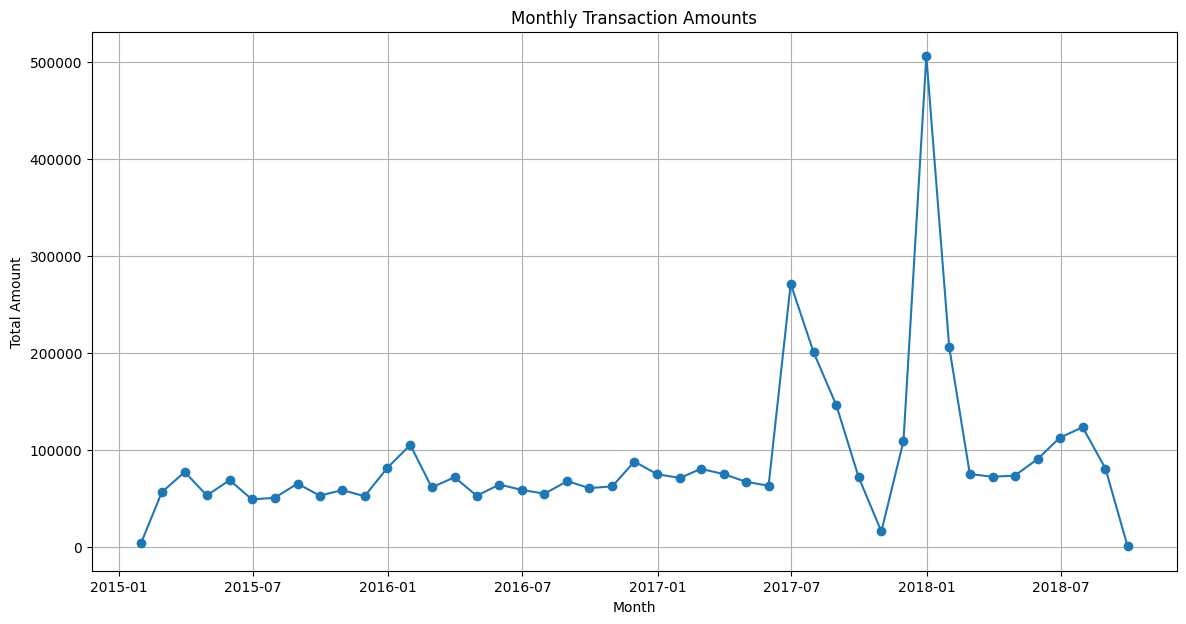

In [ ]:
# Resample data to monthly frequency
monthly_data = df.resample('M', on='Date').sum()
plt.figure(figsize=(14, 7))
plt.plot(monthly_data.index, monthly_data['Amount'], marker='o')
plt.title('Monthly Transaction Amounts')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()


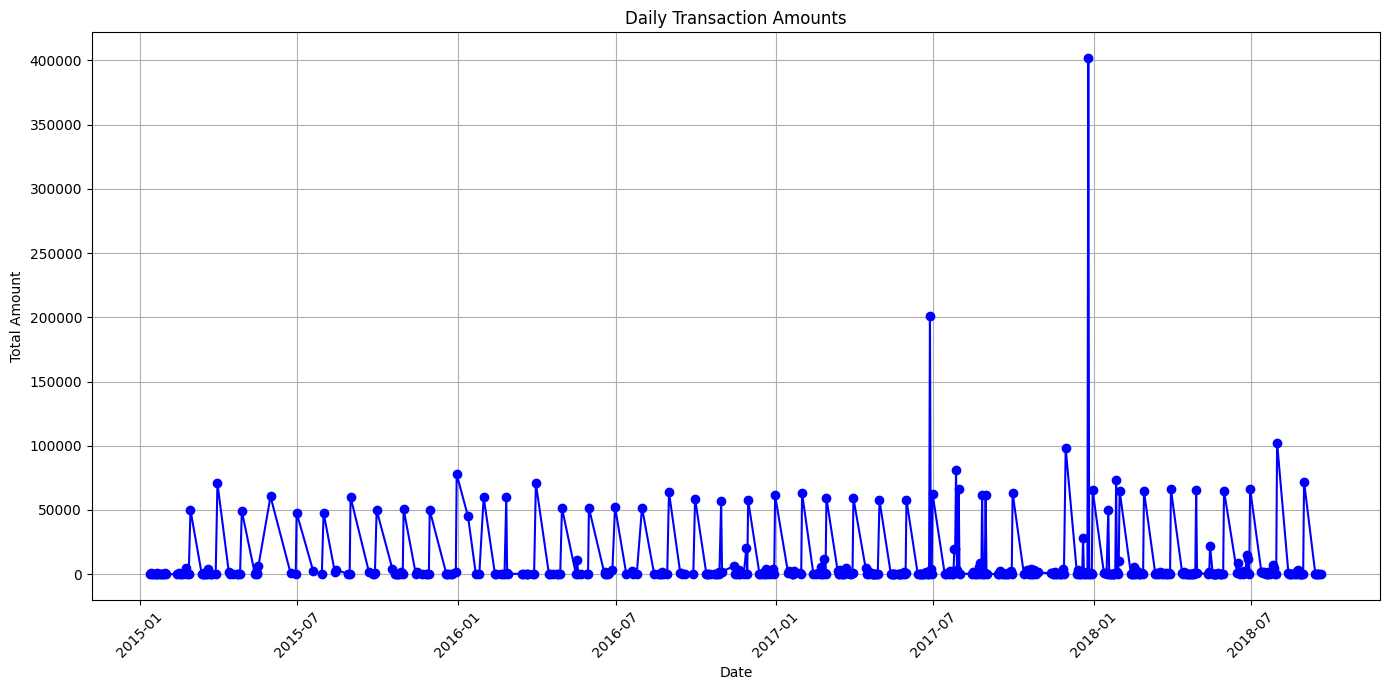

In [ ]:
# Daily trends
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Handle invalid dates by setting to NaT

# Ensure 'Amount' column is numeric
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')  # Handle invalid amounts by setting to NaN

# Drop rows with missing data
df.dropna(subset=['Date', 'Amount'], inplace=True)

# Group by the date (ignoring time) and sum the Amounts
daily_data = df.groupby(df['Date'].dt.date)['Amount'].sum()

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(daily_data.index, daily_data.values, marker='o', color='b')
plt.title('Daily Transaction Amounts')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels properly
plt.show()

<ipython-input-28-d695c696cccc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Mode', palette = 'Set2', edgecolor = 'k',


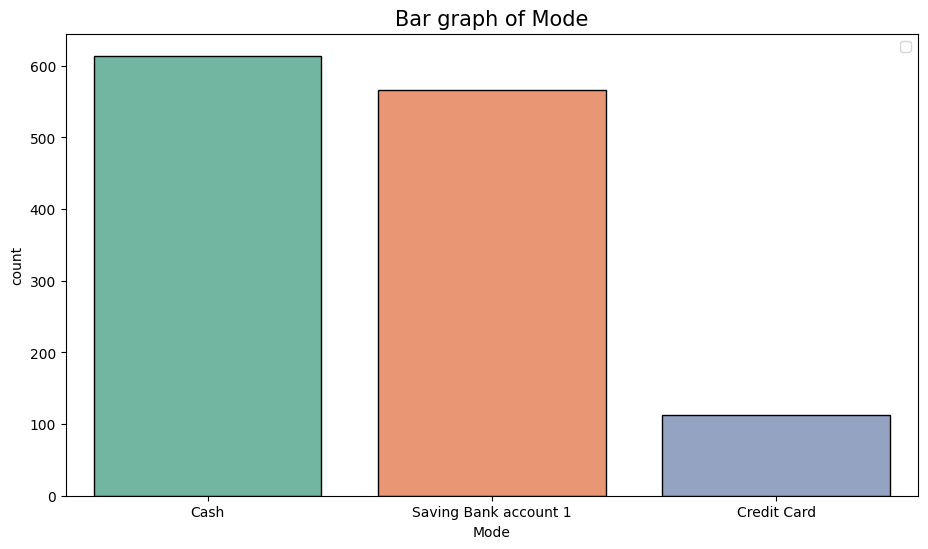

In [ ]:
# Create a count plot of the "Mode" feature

plt.figure(figsize = (11,6))
sns.countplot(data = df, x = 'Mode', palette = 'Set2', edgecolor = 'k',
order = df["Mode"].value_counts().iloc[:3].index)
plt.title("Bar graph of Mode",fontsize = 15)
plt.legend()
plt.show()

In [ ]:
df["Category"].value_counts()

,count
Category,
Food,516
Transportation,199
Household,127
subscription,79
Other,76
Health,52
Salary,42
Family,41
Apparel,29


<ipython-input-30-709cdca20691>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Category', palette = 'Set2', edgecolor = 'k',


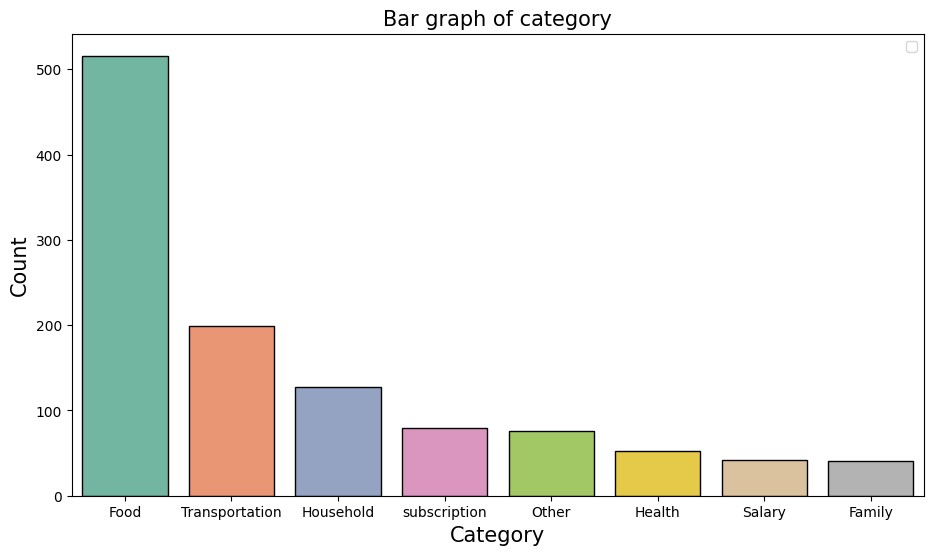

In [ ]:
# Create a count plot of the "Category" feature

plt.figure(figsize = (11,6))
sns.countplot(data = df, x = 'Category', palette = 'Set2', edgecolor = 'k',
order = df["Category"].value_counts().iloc[:8].index)
plt.title("Bar graph of category",fontsize = 15)
plt.xlabel("Category",fontsize = 15)
plt.ylabel("Count",fontsize = 15)

plt.legend()
plt.show()

In [ ]:
df.dtypes

,0
Date,datetime64[ns]
Mode,object
Category,object
Subcategory,object
Note,object
Amount,float64
Income/Expense,object
Currency,object


In [ ]:
df['Subcategory'].unique()

array(['Train', 'snacks', 'Mobile Service Provider', 'Ganesh Pujan',
       'Tata Sky', 'auto', 'unknown', 'Grocery', 'Pocket money', 'Dinner',
       'Milk', 'Sweets', 'Kirana', 'Ice cream', 'curd', 'breakfast',
       'Biscuits', 'Laundry', 'Rajgira ladu', 'Navratri', 'train',
       'Lunch', 'Tea', 'flour mill', 'Appliances', 'home decor', 'Home',
       'chocolate', 'Medicine', 'Eating out', 'Movie', 'vegetables',
       'fruits', 'Potato', 'Onions', 'Taxi', 'Hardware', 'Kitchen',
       'Footwear', 'Entry Fees', 'gadgets', 'Accessories', 'Health',
       'grooming', 'misc', 'Stationary', 'beverage', 'Eggs', 'makeup',
       'Bike', 'Lab Tests', 'Books', 'clothes', 'Toiletries', 'Bread',
       'Clothing', 'Leisure', 'Newspaper', 'Edtech Course', 'Hospital',
       'Mahanagar Gas', 'Hotstar', 'Diwali', 'Travels', 'Trip',
       'Furniture', 'Water', 'Bus', 'Cable TV', 'Netflix',
       'Wifi Internet Service', 'medicine', 'ropeway', 'gift',
       'Rakshabandhan', 'Saloon', 'Amazon

<ipython-input-33-56bbcf55cd8a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df,x = "Subcategory", palette = 'Set2',edgecolor = 'k',


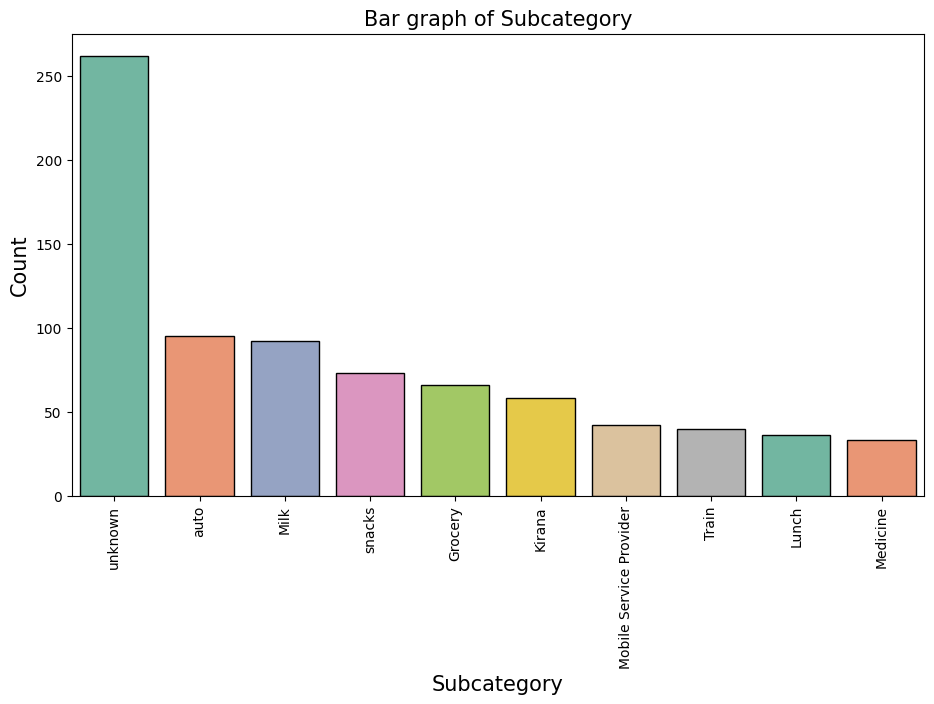

In [ ]:
# Create a count plot of the "Subcategory" feature

plt.figure(figsize = (11,6))
sns.countplot(data = df,x = "Subcategory", palette = 'Set2',edgecolor = 'k',
order = df["Subcategory"].value_counts().iloc[:10].index)
plt.title("Bar graph of Subcategory",fontsize = 15)
plt.xlabel("Subcategory",fontsize = 15)
plt.ylabel("Count",fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df["Note"].nunique()


706

In [ ]:
df["Currency"].value_counts()


,count
Currency,
INR,1303


<ipython-input-36-459bbfae9da3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = "Amount", y = "Category", palette = 'Set2' ,order =


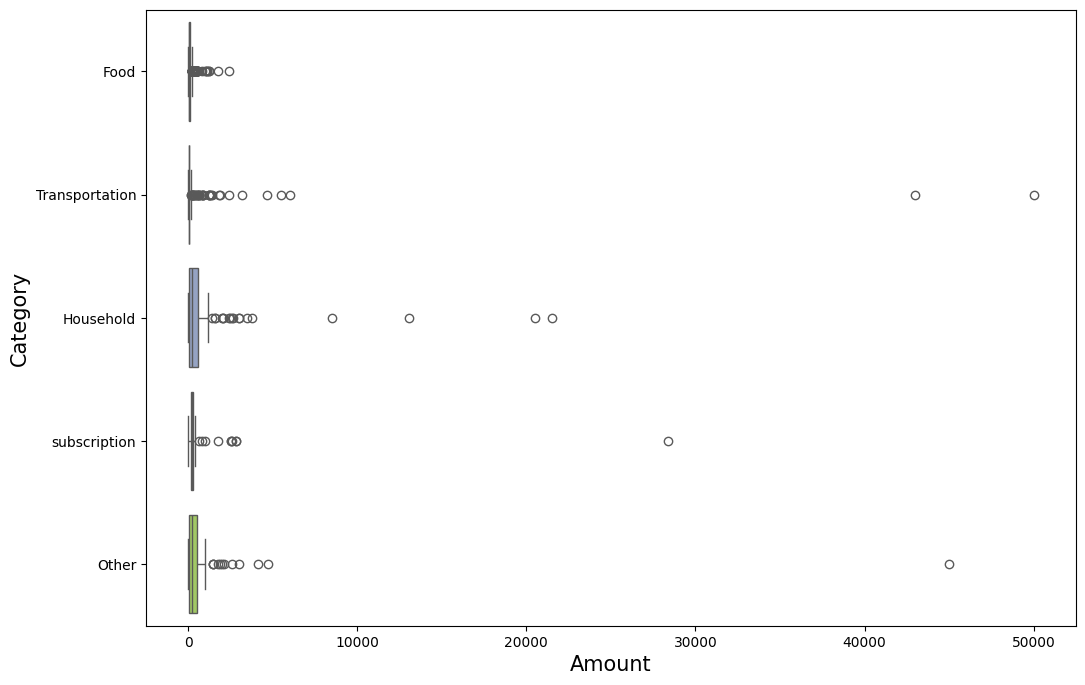

In [ ]:
plt.figure(figsize = (12,8))
sns.boxplot(data = df, x = "Amount", y = "Category", palette = 'Set2' ,order =
df["Category"].value_counts().iloc[:5].index)
plt.xlabel('Amount',fontsize = 15)
plt.ylabel('Category',fontsize = 15)
plt.show()


<ipython-input-37-420b5b54a5fe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = "Amount", y = "Subcategory",  palette = 'Set2',order =


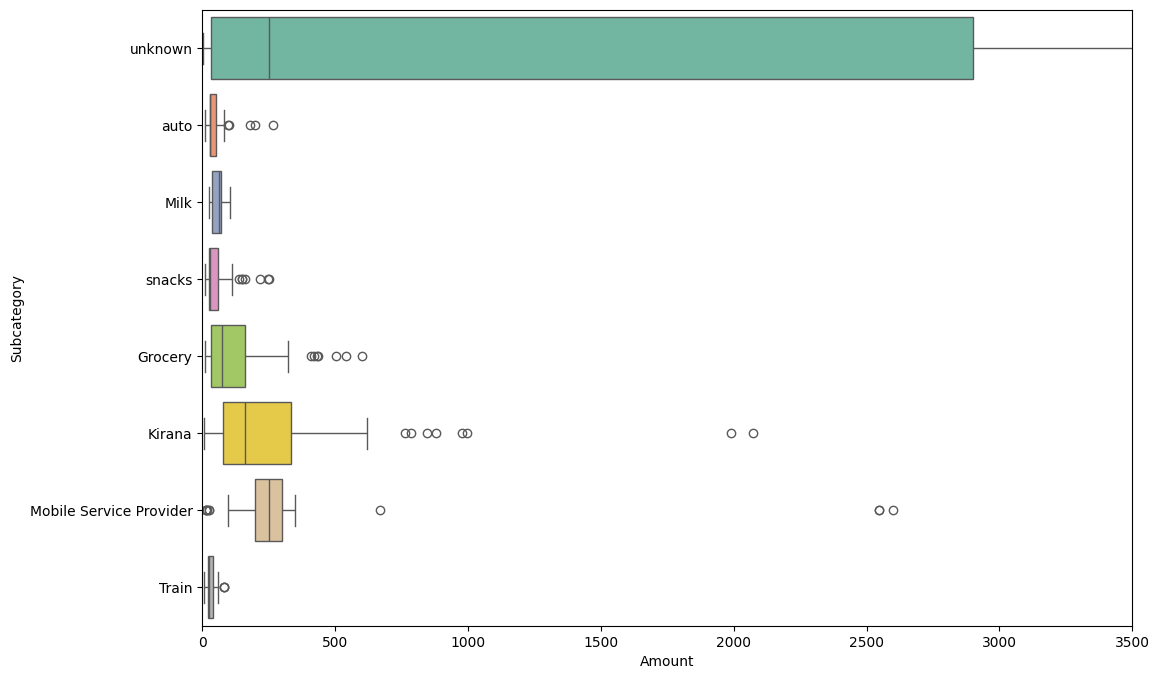

In [ ]:
plt.figure(figsize = (12,8))
sns.boxplot(data = df, x = "Amount", y = "Subcategory",  palette = 'Set2',order =
df["Subcategory"].value_counts().iloc[:8].index)
plt.xlim(0,3500)
plt.show()
